In [1]:
#Importing libraries
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
import numpy as np 
import datetime as dt

In [2]:
N = 13
colors_df = pd.Series(np.random.randint(10,50,N), index=np.arange(1,N+1))
cmap = plt.cm.tab10
colors = cmap(np.arange(len(colors_df)) % cmap.N)

In [3]:
#Getting the files names
path = os.getcwd()
os.listdir(path)

['.ipynb_checkpoints',
 'graph_1.png',
 'graph_2.png',
 'graph_3.png',
 'graph_4.png',
 'SCM Shipment Report.pptx',
 'scm_delivery_dataset.csv',
 'supply_chain_fast_reports.ipynb']

In [4]:
#Loading the data
df = pd.read_csv('scm_delivery_dataset.csv', parse_dates=True)
df.dropna(axis=0,how='all',inplace=True)
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [5]:
#Getting the total of rows
total_rows = df.shape[0]
print('Total of data rows: {}'.format(total_rows))

Total of data rows: 10324


# Top 10 country with most SKUs orders

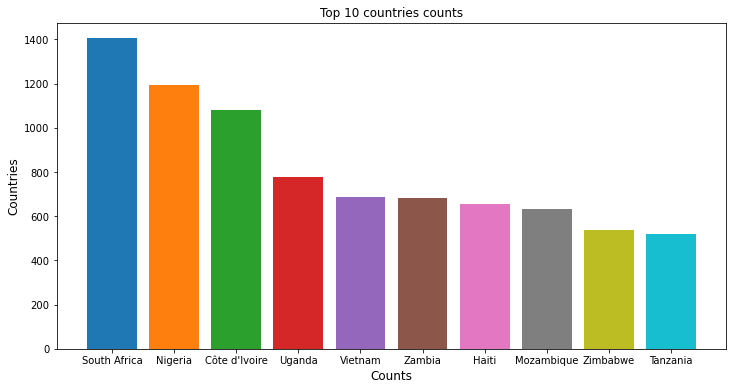

In [6]:
#Plotting the graph of top 10 country with most skus orders

#Top country count
top_country_count = df['Country'].value_counts().nlargest(10)

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(top_country_count.index, top_country_count.values, color=colors)

ax.set_ylabel('Countries', fontsize = 12)
ax.set_xlabel('Counts', fontsize = 12)
ax.set_title('Top 10 countries counts', fontsize = 12)
plt.show()

# Save plot
filename = 'graph_1' + ".png"
path_plot = filename
fig.savefig(path_plot, dpi=fig.dpi)

# Top 10 country with the largest pack prices

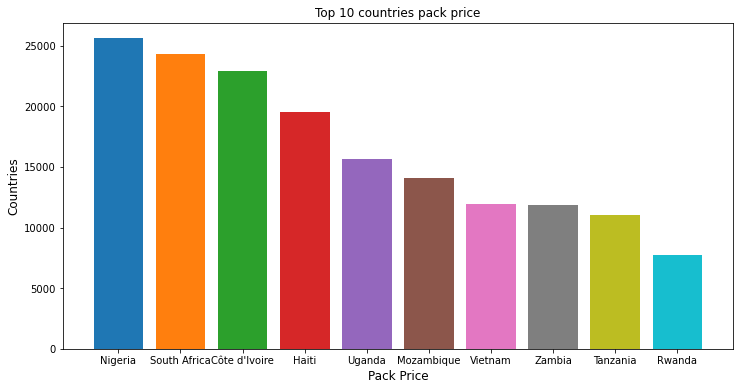

In [7]:
#Plotting the graph of top 10 country with the largest pack prices

#Top country pack price
top_country_pack_price = df.groupby(['Country'])['Pack Price'].sum().nlargest(10)

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(top_country_pack_price.index, top_country_pack_price.values, color=colors)

ax.set_ylabel('Countries', fontsize = 12)
ax.set_xlabel('Pack Price', fontsize = 12)
ax.set_title('Top 10 countries pack price', fontsize = 12)
plt.show()

# Save plot
filename = 'graph_2' + ".png"
path_plot = filename
fig.savefig(path_plot, dpi=fig.dpi)

# Pie chart of shipment mode percentage

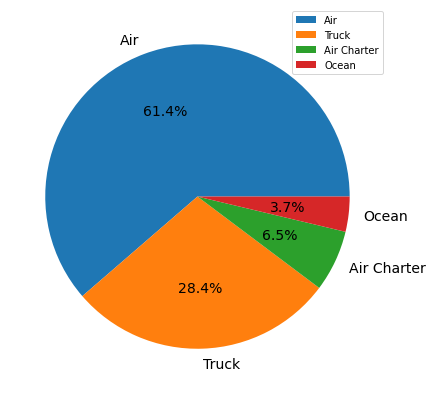

In [8]:
#Shipment Mode Percentage
shipping_mode = df["Shipment Mode"].value_counts()
labels = (np.array(shipping_mode.index))
sizes = (np.array((shipping_mode / shipping_mode.sum())*100))

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 14})
plt.legend()
plt.show()

# Save plot
filename = 'graph_3' + ".png"
path_plot = filename
fig.savefig(path_plot, dpi=fig.dpi)

# Report of the week plot

In [9]:
df_last_7_day = df.copy()

df_last_7_day['Delivered to Client Date'] = pd.to_datetime(df_last_7_day['Delivered to Client Date'])
df_last_7_day.sort_values(by='Delivered to Client Date', ascending=True, inplace=True)

n = df_last_7_day.shape[0]-1

last_day = str(df_last_7_day['Delivered to Client Date'][int(df_last_7_day.shape[0]-1)]) #This values most to be today() but..... this dataset is very old
last_day = dt.datetime.strptime(str(last_day[0:10]), "%Y-%m-%d")

x = 0
for i in range(0,n):
    date = str(df_last_7_day['Delivered to Client Date'][i])[0:10]
    date = dt.datetime.strptime(date, "%Y-%m-%d")
    if date > last_day - dt.timedelta(days=6):
        x = x + 1
        
df_last_7_day = df_last_7_day.iloc[0:x,:]

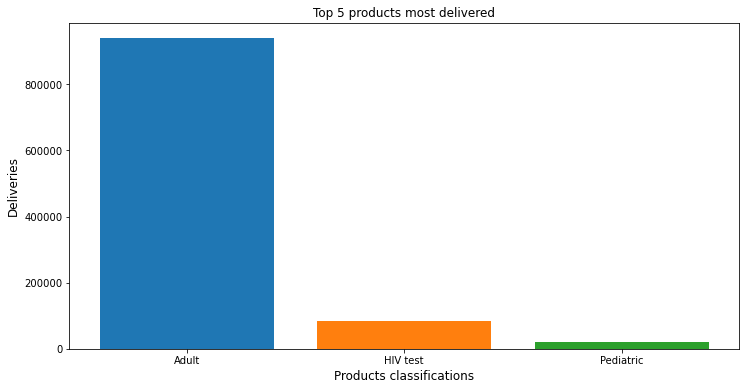

In [10]:
df_last_top_products = df_last_7_day.groupby(['Sub Classification'])['Line Item Quantity'].sum()

fig, ax = plt.subplots(figsize=(12,6))

ax.bar(df_last_top_products.index, df_last_top_products.values, color=colors)

ax.set_ylabel('Deliveries', fontsize = 12)
ax.set_xlabel('Products classifications', fontsize = 12)
ax.set_title('Top 5 products most delivered', fontsize = 12)
plt.show()

# Save plot
filename = 'graph_4' + ".png"
path_plot = filename
fig.savefig(path_plot, dpi=fig.dpi)

In [11]:
df_last_7_day['Freight Cost (USD)'] = pd.to_numeric(df_last_7_day['Freight Cost (USD)'], errors='coerce')
total_freight_cost = df_last_7_day['Freight Cost (USD)'].sum()

In [12]:
df_last_7_day['Weight (Kilograms)'] = pd.to_numeric(df_last_7_day['Weight (Kilograms)'], errors='coerce')
total_weight_transported = df_last_7_day['Weight (Kilograms)'].sum()

In [13]:
df_last_7_day['Line Item Value'] = pd.to_numeric(df_last_7_day['Line Item Value'], errors='coerce')
total_revenue = df_last_7_day['Line Item Value'].sum()

# Creating the introdution slide!

In [14]:
# Create the presentation object
prs = Presentation()

# Layout Choice for the introduction slide
image_slide_layout = prs.slide_layouts[5]
page = 1

'''Slide Introduction'''
# Create the slide
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
background = slide.background
fill = background.fill
fill.solid()
fill.fore_color.rgb = RGBColor(0, 32, 96)

# Add Title
title.text = "Supply Chain Fast Reports"
title.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)

# Add Subtitle
subtitle.text = 'Dataset: SCM Shipment Historic'
subtitle.text_frame.paragraphs[0].font.color.rgb = RGBColor(255, 255, 255)

# First overall analysis slide!

In [15]:
'''Analysis Slide'''
# Create a slide
slide = prs.slides.add_slide(image_slide_layout)
shapes = slide.shapes

# Create Title
title_shape = shapes.title
title_shape.text = 'SCM Shipment Overall Analysis'

# Add Image
left = Inches(0.75)
top = Inches(1.25)
pic = slide.shapes.add_picture('graph_1.png', left, top, height=Inches(4.5))

# Build the Text Box
left = Inches(0.75)
top = Inches(1.5) + Inches(4)
width = Inches(9)
height = Inches(2)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
    
# Title
p = tf.add_paragraph()
p.text = 'Exploratory Analysis'
p.font.size = Pt(18)
    
# First bullet point
p = tf.add_paragraph()
p.text = '• Country with most SKUs requests:{} ({})'.format(str(top_country_count.index[0]),str(top_country_count.values[0]))
p.level = 1
    
# Second bullet point
p = tf.add_paragraph()
p.text = '• Country with largest revenue with pack delivery: {} (${})'.format(str(top_country_pack_price.index[0]),str(top_country_pack_price.values[0]))
p.level = 1

# Add page
page += 1

# Second overall analysis slide!

In [16]:
'''Analysis Slide'''
# Create a slide
slide = prs.slides.add_slide(image_slide_layout)
shapes = slide.shapes

# Create Title
title_shape = shapes.title
title_shape.text = 'SCM Shipment Most Used Type'

# Add Image
left = Inches(1.5)
top = Inches(1.0)
pic = slide.shapes.add_picture('graph_3.png', left, top, height=Inches(5.5))

# Build the Text Box
left = Inches(0.75)
top = Inches(1.5) + Inches(4)
width = Inches(9)
height = Inches(2)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
    
# Title
p = tf.add_paragraph()
p.text = 'Shipment type analysis'
p.font.size = Pt(18)
    
# First bullet point
p = tf.add_paragraph()
p.text = '• Most used transportation type: {}'.format(shipping_mode.index[0])
p.level = 1

p = tf.add_paragraph()
p.text = '• Shipment types: {}'.format(list(shipping_mode.index))
p.level = 1

p = tf.add_paragraph()
p.text = '• Pack price of the top 1 country: ${}'.format(top_country_pack_price[0])
p.level = 1

# Add page
page += 1

# Report of the week

In [17]:
'''Analysis Slide'''
# Create a slide
slide = prs.slides.add_slide(image_slide_layout)
shapes = slide.shapes

# Create Title
title_shape = shapes.title
title_shape.text = 'Fast Report'

# Title
p = tf.add_paragraph()
p.text = 'Most Delivered Products in the Week'
p.font.size = Pt(18)

# Add Image
left = Inches(0.5)
top = Inches(1.4)
pic = slide.shapes.add_picture('graph_4.png', left, top, height=Inches(4.5))

# Build the Text Box
left = Inches(0.75)
top = Inches(1.5) + Inches(4)
width = Inches(9)
height = Inches(2)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame
    
# Title
p = tf.add_paragraph()
p.text = 'Week Report:'
p.font.size = Pt(18)
    
# First bullet point
p = tf.add_paragraph()
p.text = '• Total freight cost: ${}'.format(round(total_freight_cost,2))
p.level = 1

p = tf.add_paragraph()
p.text = '• Total weight transported: {}Kg'.format(round(total_weight_transported,2))
p.level = 1

p = tf.add_paragraph()
p.text = '• Total revenue in the week: ${}'.format(round(total_revenue,2))
p.level = 1

# Saving the file in .pptx!

In [18]:
# Save
prs.save('SCM Shipment Report.pptx')